# Utilizando algoritmo classificador de Rede Neural Artificial do scikit-learn: Multi-Layer Perceptron

In [1]:
# Importando a biblioteca para a classificação por Redes Neurais Artificiais (Multi-Layer Perceptron) e a biblioteca que irá carregar os dados de treinamento e teste
import pickle
from sklearn.neural_network import MLPClassifier

In [2]:
with open("base.pkl", "rb") as df:
    X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste = pickle.load(df)

In [3]:
# Verificando o shape dos atributos
X_base_treinamento.shape, y_base_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_base_teste.shape, y_base_teste.shape

((500, 3), (500,))

In [42]:
rede_neural = MLPClassifier(max_iter=1500, verbose=True, tol=0.000000001, solver= "adam", activation= "relu", hidden_layer_sizes=(100,100), random_state=1)
rede_neural.fit(X_base_treinamento, y_base_treinamento) #Maximum interation = Epocas. 

Iteration 1, loss = 0.59379818
Iteration 2, loss = 0.45248840
Iteration 3, loss = 0.35689148
Iteration 4, loss = 0.28489732
Iteration 5, loss = 0.22804996
Iteration 6, loss = 0.18790165
Iteration 7, loss = 0.15638546
Iteration 8, loss = 0.13345623
Iteration 9, loss = 0.11720282
Iteration 10, loss = 0.10521745
Iteration 11, loss = 0.09580952
Iteration 12, loss = 0.08860649
Iteration 13, loss = 0.08266478
Iteration 14, loss = 0.07697594
Iteration 15, loss = 0.07244313
Iteration 16, loss = 0.06752359
Iteration 17, loss = 0.06454389
Iteration 18, loss = 0.05991747
Iteration 19, loss = 0.05770333
Iteration 20, loss = 0.05399834
Iteration 21, loss = 0.05146260
Iteration 22, loss = 0.04878893
Iteration 23, loss = 0.04662753
Iteration 24, loss = 0.04448602
Iteration 25, loss = 0.04262786
Iteration 26, loss = 0.04079218
Iteration 27, loss = 0.03942295
Iteration 28, loss = 0.03762856
Iteration 29, loss = 0.03602582
Iteration 30, loss = 0.03501978
Iteration 31, loss = 0.03360972
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1500, random_state=1,
              tol=1e-09, verbose=True)

##### Sobre os parâmetros utilizados:
* max_iter: Foi utilizado 1500 épocas para diminuir o número de erros nessa base, visto que o valor padrão de 200 épocas não se mostrou suficiente. Além do mais, foram testadas 800, 1000, 1200 épocas. Como a base do estudo não é grande, um número maior de épocas não foi necessário.  
* verbose: Foi ajustado para "True" com o intuito de ser visualizado o valor do erro época por época. A mudança não faz diferença no resultado do algoritmo mas trouxe para o desenvolvedor um feedback sobre o andamento do código. 
* tol: Foi utilizado para fazer o algoritmo rodar por mais épocas até atingir o maior número de zeros na perda. 
* solver: A utilização do valor "adam" foi uma escolha padrão, visto que é o algoritmo mais utilizado na área de Deeplearning. O valor é uma melhoria da descida do gradiente e mesmo a base não sendo tão grande, resolvi usa-lo.
* activation: A utilização do valor "relu" foi uma escolha padrão, visto que é a função de ativação mais utilizada na área de aprendizado de máquina
* hidden_layer_sizes: A camada oculta foi uma escolha apriori, as configurações serão revistas futuramente com a função GridSearchCV() do sklearn
* random_state: Para manter valor fixo dos testes.


In [43]:
previsao = rede_neural.predict(X_base_teste)

In [44]:
from sklearn.metrics import accuracy_score, classification_report
print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 99.6%


0.996

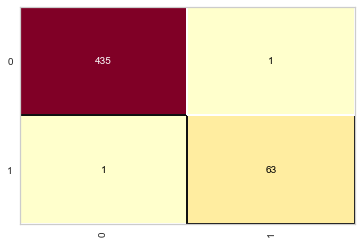

In [40]:
# Visualizando onde está a maior precisão do algoritmo, se no pagante ou não-pagante. Neste caso, a precisão do algoritmo é quase 100%. O que se mostra o ideal, visto que o objetivo do algoritmo seria evitar a perda de dinheiro por emprestimo de um banco. Errou apenas uma classificação dos não-pagantes.
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rede_neural)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [41]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      0.98      0.98        64

    accuracy                           1.00       500
   macro avg       0.99      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



#### O algoritmo consegue identificar corretamente 100% dos dados da classe 0 (Pagantes) com uma precisão de 100% e 98% dos dados da classe 1 (Não-Pagantes) com uma precisão de 98%.

# FIM